In [5]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l
from torch import nn

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = d2l.synthetic_data(true_w,true_b,1000)
features,labels

def load_array(data_arrays,batch_size,is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size = 10
data_iter = load_array((features,labels),batch_size)
next(iter(data_iter))

tensor([0.])

In [6]:
#定义网络
net = nn.Sequential(nn.Linear(2,1))
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [8]:
#定义损失函数
loss = nn.MSELoss()

In [7]:
#定义优化算法
trainer = torch.optim.SGD(net.parameters(),lr=0.03)


In [22]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        # print(f"l is {l}")
        trainer.zero_grad()
        l.backward() 
        trainer.step()
    with torch.no_grad():
        train_l = loss(net(features), labels)
        print(f'epoch {epoch + 1}, loss {train_l:f}')

epoch 1, loss 0.000099
epoch 2, loss 0.000099
epoch 3, loss 0.000098


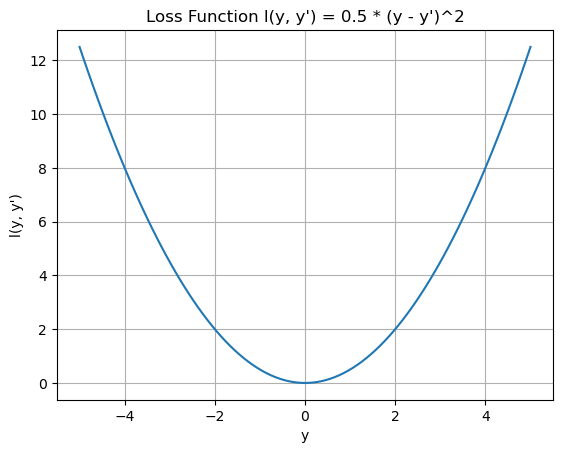

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个范围的y值
y = np.linspace(-5, 5, 100)

# 创建l(y, y')的函数
def loss_function(y, y_prime):
    return 0.5 * (y - y_prime) ** 2

# 设置y'的值
y_prime = 0

# 计算l(y, y')的值
loss = loss_function(y, y_prime)

# 绘制图形
plt.plot(y, loss)
plt.xlabel('y')
plt.ylabel('l(y, y\')')
plt.title('Loss Function l(y, y\') = 0.5 * (y - y\')^2')
plt.grid(True)
plt.show()


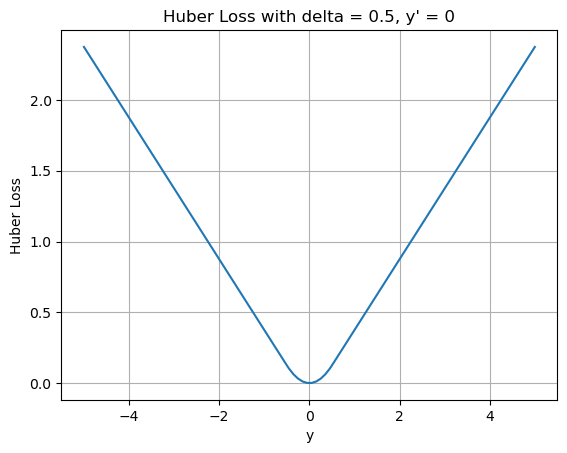

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个范围的y值
y = np.linspace(-5, 5, 100)

# 创建Huber损失函数
def huber_loss(y, y_prime, delta):
    absolute_error = np.abs(y - y_prime)
    quadratic_loss = 0.5 * (absolute_error ** 2)
    linear_loss = delta * (absolute_error - 0.5 * delta)
    return np.where(absolute_error <= delta, quadratic_loss, linear_loss)

# 设置y'的值和delta
y_prime = 0
delta = 0.5

# 计算Huber损失的值
loss = huber_loss(y, y_prime, delta)

# 绘制图形
plt.plot(y, loss)
plt.xlabel('y')
plt.ylabel('Huber Loss')
plt.title(f'Huber Loss with delta = {delta}, y\' = {y_prime}')
plt.grid(True)
plt.show()


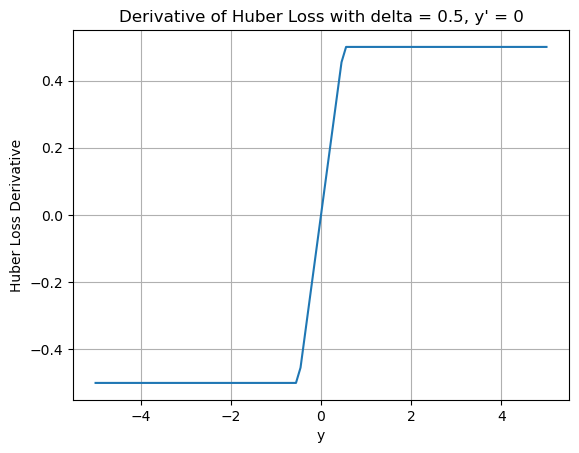

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个范围的y值
y = np.linspace(-5, 5, 100)

# 创建Huber损失函数的导数
def huber_loss_derivative(y, y_prime, delta):
    absolute_error = np.abs(y - y_prime)
    derivative = np.where(absolute_error <= delta, y - y_prime, delta * np.sign(y - y_prime))
    return derivative

# 设置y'的值和delta
y_prime = 0
delta = 0.5

# 计算Huber损失函数的导数
derivative = huber_loss_derivative(y, y_prime, delta)

# 绘制导数图形
plt.plot(y, derivative)
plt.xlabel('y')
plt.ylabel('Huber Loss Derivative')
plt.title(f'Derivative of Huber Loss with delta = {delta}, y\' = {y_prime}')
plt.grid(True)
plt.show()
